### How to determine stoploss ranges.

We must determine what decrease in value can be considered anomalous and be treated as stoploss.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path = '/Users/renero/trader/output/forecast_acciona_konkorde_2019.csv'
df = pd.read_csv(path)
df.head()

,test_y,forecast,verde,azul
0,81.88,82.26,-0.67,-0.27
1,83.10,82.13,-0.67,0.04
2,83.44,84.24,-0.67,0.00
3,83.66,82.80,-0.67,0.08
4,84.84,83.20,-0.67,-0.01


Compute basic metrics over the dataset, including the differences in consecutive prices

Q1 = -0.59
IQR = 1.55
median = 0.27


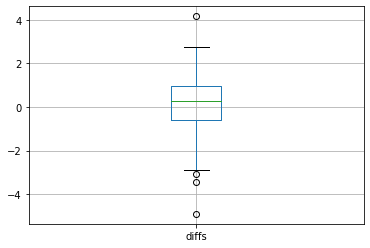

In [20]:
df['diffs'] = df['test_y'].diff()
Q1 = df['diffs'].quantile(0.25)
Q3 = df['diffs'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 = {:.2f}'.format(Q1))
print('IQR = {:.2f}'.format(IQR))
print('median = {:.2f}'.format(df.diffs.median()))
df.boxplot(column='diffs');

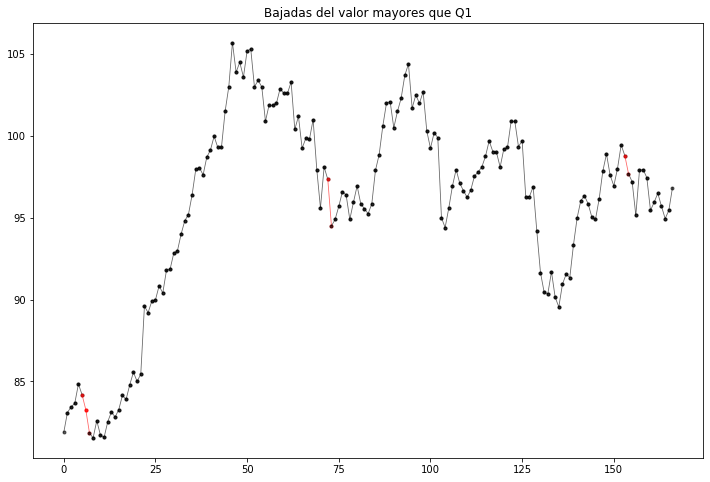

In [39]:
plt.figure(figsize=(12,8))
for i in range(df.shape[0]-1):
    if df.iloc[i]['diffs'] < Q1 and df.iloc[i+1]['diffs'] < df.iloc[i]['diffs']:
        segment_color='red'
    else:
        segment_color='black'
    plt.plot([i, i+1], [df.test_y.iloc[i], df.test_y.iloc[i+1]], 
             marker='.', 
             linewidth=0.8, alpha=0.6,
             color=segment_color)
plt.title('Bajadas del valor mayores que Q1')
plt.show()